# Building My First Neural Network

# Step-1: Import Essential Libraries

In [1]:
# first neural network with keras tutorial
import numpy as np
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import datetime as dt




In [ ]:
import os
os.listdir()

['.config', 'sample_data']

# Step-2: Loading the Dataset

In [ ]:
# load the dataset
import numpy
dataset = numpy.loadtxt('https://raw.githubusercontent.com/hantak123/CSS262_RawData/main/pima-indians-diabetes.csv', delimiter=',')


In [ ]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


# Step-3: Splitting Input (X) and Output(Y) Variables

In [ ]:
# split into input (X) and output (y) variables
x = dataset[:,0:8]
y = dataset[:,8]


In [ ]:
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

# Step-4: Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument)
The first hidden layer has 12 nodes and uses the relu activation function.
The second hidden layer has 8 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function

In [ ]:
# define the keras model
model = Sequential()

#adding first hidden layer
"""
input_dim=8 indicates that there are 8 columns are going to be passed as x
Dense indicates that it is a fully connected layers means evrey neuron is connected
with every other neuron.
12 indicates that the first hidden layer has 12 neurons
activation function is relu
"""
model.add(Dense(12, input_dim=8, activation='relu'))

#adding second hidden layer
"""
fully connected network
there are 8 neurons in this layer
"""
model.add(Dense(8, activation='relu'))

#Adding an output layer
"""
Fully connected layer.
AS it is a classification problem, there is only one neuron in the output layer
"""
model.add(Dense(1, activation='sigmoid'))

# Step-5: Model Compilation

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x, y, epochs=100, batch_size=5)


Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 2.2221 - accuracy: 0.4870
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7565 - accuracy: 0.6536
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6549
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6693
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6719
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6784
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.6849
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7044
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.6992
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5746 - accura

The last epoch shows the accuracy. It means that 77.73% times, it classified correctly

# Step-6: Showing the summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Step-7: Finding the accuracy

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.7487
Accuracy: 74.87


# HW to students

## Q-1: Findout how did the Param  are calculated in model.summary()?

The model.summary() calculated the number of parameters using the formula **‘(input_size * output_size) + output_size’**, where the input size is the number of input features to the layer, output_size is the number of neurons in the layer, and the ‘+ output_size’ term accounts for the bias terms (one bias term per neuron).

For dense_1, the number of parameters is calculated by **‘(8 * 12) + 12 = 108’**.

For dense_2, the number of parameters is calculated by **‘(12 * 8) + 8 = 104’**.

For dense_3, the number of parameters is calculated by **‘(8 * 1) + 1 = 9’**.

Reference: https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca

## Q-2: How does model.evaluate(x,y) workout? what is the formula behind it?
Why does the accuracy from model.evaluate(x,y) different from the accuracy score from the last epoch?

The **‘model.evaluate(x, y)’** function in Keras computes the loss value and metrics (such as accuracy). It typically includes the loss value and any other metrics specified during model compilation.

For example, the model was compiled with a loss function of **'binary_crossentropy'** and specified 'accuracy' as a metric, the results would be a list containing the loss value followed by the accuracy. If additional metrics were stated, they would appear in the list in the order they were specified.

The formula for accuracy is **Accuracy = Total number of predictions / Number of correct predictions**

Lastly, there may be multiple reasons for the difference in accuracy of ‘model.evaluate(x, y)’ and the last epoch. **Batch Normalization** could have been applied to improve generalization and prevent overfitting, and **data shuffling** could have been used to prevent the model from memorizing the order of the training examples.

Reference:
https://deepchecks.com/how-to-check-the-accuracy-of-your-machine-learning-model/
https://saturncloud.io/blog/why-you-need-to-compile-your-keras-model-before-using-modelevaluate/#:~:text=evaluate()-,The%20model.,model%20to%20assess%20its%20performance.

## Q-3: Take suitable dataset for classification and develop a simple neural network program


In [24]:
# load the dataset
dataset = pd.read_csv(r'https://raw.githubusercontent.com/hantak123/CSS262_RawData/main/breast-cancer.csv') #JPadilla change dataset from upload to hosted from github
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
# removing the id column
dataset = dataset.drop(columns=['id'])
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
# replacing the values [M, B]' in to [1, 0] in diagnosis column
dataset = dataset.replace(['M', 'B'], [1, 0])
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
# split into input (X) and output (y) variables
x = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [28]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [29]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [30]:
# define the keras model
model = Sequential()

#adding first hidden layer
model.add(Dense(16, input_dim=30, activation='relu'))

#adding second hidden layer
model.add(Dense(14, activation='relu'))

#Adding an output layer
model.add(Dense(1, activation='sigmoid'))


In [31]:
%%time
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x, y, epochs=100, batch_size=20)


Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 3.7152 - accuracy: 0.5431
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.7838
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8919 - accuracy: 0.8049
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.8664
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8735
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8770
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8928
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8893
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8963
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9104
Epoch 11/

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                496       
                                                                 
 dense_10 (Dense)            (None, 14)                238       
                                                                 
 dense_11 (Dense)            (None, 1)                 15        
                                                                 
Total params: 749 (2.93 KB)
Trainable params: 749 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
%%time
# evaluate the keras model
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9156
Accuracy: 91.56
CPU times: user 229 ms, sys: 2.8 ms, total: 232 ms
Wall time: 230 ms


## Q-3-1

The model.summary() calculated the number of parameters using the formula **‘(input_size * output_size) + output_size’**, where the input size is the number of input features to the layer, output_size is the number of neurons in the layer, and the ‘+ output_size’ term accounts for the bias terms (one bias term per neuron).

For dense_9, the number of parameters is calculated by **‘(16 * 30) + 16 = 496’**.

For dense_10, the number of parameters is calculated by **‘(14 * 16) + 14 = 238’**.

For dense_11, the number of parameters is calculated by **‘(14 * 1) + 1 = 15’**.

## Q-3-2

The model.evaluate(x, y) function in Keras calculates both the loss value and any specified metrics, such as accuracy. The output typically consists of the loss value followed by the specified metrics.

For instance, if the model was compiled with a loss function like 'binary_crossentropy' and included 'accuracy' as a metric, the output would be a list containing the loss value followed by the accuracy. Additional metrics, if specified, would also be included in the output list, following the order in which they were specified during model compilation.

Accuracy, defined as the ratio of the total number of correct predictions to the total number of predictions, is computed as part of the evaluation process.

Lastly, discrepancies in accuracy between model.evaluate(x, y) and the last epoch's accuracy may arise due to various factors. Techniques such as **Batch Normalization** might have been applied to enhance generalization and counter overfitting. Additionally, **shuffling** the data during training helps prevent the model from memorizing the sequence of training examples, contributing to differences in performance metrics.

In [34]:
from datetime import datetime as dt
import time
import pandas as pd
model = Sequential()

#adding first hidden layer
model.add(Dense(16, input_dim=30, activation='relu'))

#adding second hidden layer
model.add(Dense(14, activation='relu'))

#Adding an output layer
model.add(Dense(1, activation='sigmoid'))

dtf = pd.DataFrame({'run_no' : [], 'no_of_batches': [], 'accuracy' : [], 'run_time': []})

i = 10
ctr = 1
while i <= 100:
  timestrt = dt.now()
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(x, y, epochs=100, batch_size=i)

  # evaluate the keras model
  _, accuracy = model.evaluate(x, y)
  timeend = dt.now()
  runtime = timeend - timestrt
  dtf.loc[len(dtf.index)] = [ctr, i, accuracy, runtime.seconds]
  i = i + 10
  ctr = ctr +  1


Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 5.0341 - accuracy: 0.4271
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 1.4608 - accuracy: 0.6221
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 1.4185 - accuracy: 0.6731
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 1.0016 - accuracy: 0.7610
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.8225
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.8489
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8489
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.8612
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8594
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8805
Epoch 11/

In [35]:
print(dtf)

   run_no  no_of_batches  accuracy  run_time
0     1.0           10.0  0.947276      13.0
1     2.0           20.0  0.956063      11.0
2     3.0           30.0  0.963093       6.0
3     4.0           40.0  0.964851       6.0
4     5.0           50.0  0.973638       5.0
5     6.0           60.0  0.971880       6.0
6     7.0           70.0  0.964851       6.0
7     8.0           80.0  0.964851       5.0
8     9.0           90.0  0.978910       6.0
9    10.0          100.0  0.973638       5.0


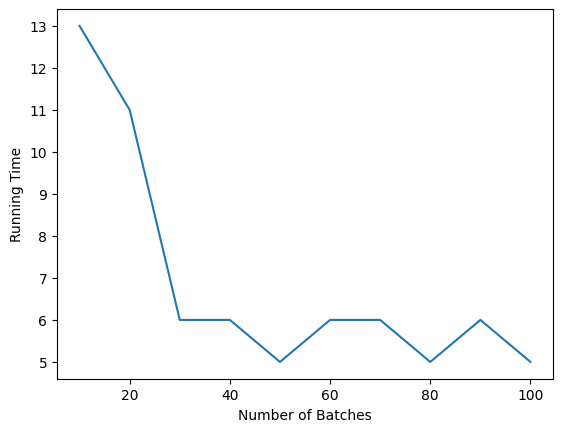

In [39]:
import matplotlib.pyplot as plt

# Create a line graph
plt.plot(dtf['no_of_batches'], dtf['run_time'])

# Add labels and title
plt.xlabel('Number of Batches')
plt.ylabel('Running Time')

# Display the graph
plt.show()


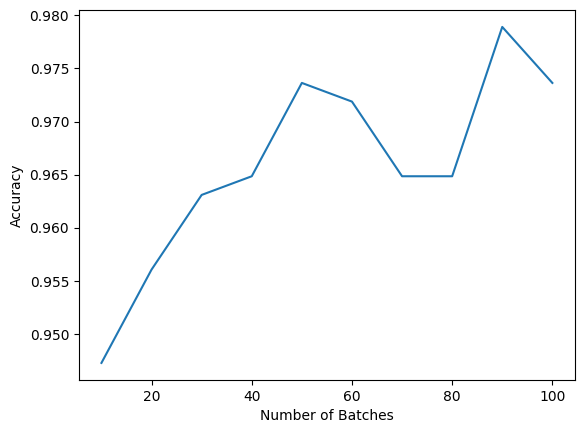

In [40]:
import matplotlib.pyplot as plt

# Create a line graph
plt.plot(dtf['no_of_batches'], dtf['accuracy'])

# Add labels and title
plt.xlabel('Number of Batches')
plt.ylabel('Accuracy')

# Display the graph
plt.show()

In [49]:
#Set the start time before the process
timestrt = dt.now()
print("Process start time is ",timestrt)

#This is where our process is taken
time.sleep(64.3)

#set the end time after the process
timend = dt.now()
print("Process end time is ",timend)

#Calculate the total running time of the process by getting the difference of the end time and the start time
runtime = timend - timestrt

runtime_s = runtime.seconds
print('Total Running Time is', runtime_s, 'Seconds.')


Process start time is  2024-03-01 15:58:04.160462
Process end time is  2024-03-01 15:59:08.504043
Total Running Time is  64 Seconds.
